In [10]:
import numpy as np
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ParameterGrid
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
import random

In [6]:
data = []

for _ in range(1000):
    salary = random.randint(30000, 80000)
    city = random.choice(['Bishkek', 'London', 'Moscow', 'New York'])
    age = random.randint(30, 65)
    vacation_prefer = random.choice(['Shopping', 'Beach holiday', 'Sightseeing', 'Skiing'])
    transport_prefer = random.choice(['auto', 'plane', 'train'])
    target = random.choice(['London', 'Moscow', 'Paris', 'Dubai'])
    
    data.append({'salary': salary, 'city': city, 'age': age, 'vacation_prefer': vacation_prefer,
                 'transport_prefer': transport_prefer, 'target': target})

data_df = pd.DataFrame(data)

data_encoded = pd.get_dummies(data_df, columns=['city', 'vacation_prefer', 'transport_prefer'])

X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# ВОТ СЕЙЧАС БУДЕТ ВЕСЕЛО!

### Перекрестная проверка в scikit-learn

In [7]:
logreg = LogisticRegression()

scores = cross_val_score(logreg, X, y)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.28  0.285 0.28  0.28  0.28 ]


In [8]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.28


In [9]:
res = cross_validate(logreg, X, y, cv=5,
                     return_train_score=True)
display(res)


NameError: name 'cross_validate' is not defined

In [ ]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.012840,0.000000,0.011236,0.019830
1,0.012102,0.000000,0.011236,0.022663
2,0.010718,0.000112,0.011364,0.014124
3,0.010962,0.000000,0.011364,0.014124
4,0.011880,0.001000,0.011364,0.019774


Mean times and scores:
 fit_time       0.011700
score_time     0.000223
test_score     0.011313
train_score    0.018103
dtype: float64


### Стратифицированная k-блочная перекрестная проверка и другие стратегии

In [ ]:
print("Метки:\n{}".format(y))

Метки:
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.         0.         0.         0.01136364 0.        ]


####  Кажеться резузльтат ниже будет лучше

In [ ]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.         0.01360544 0.00680272]


#### Не с KFold(n_splits=3) лучший резульат

In [ ]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(cross_val_score(logreg, X, y, cv=kfold)))

Значения правильности перекрестной проверки:
[0.00675676 0.         0.        ]


### Перекрестная проверка с исключением по одному

In [ ]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, X, y, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  442
Средняя правильность: 0.00


### Перекрестная проверка со случайными перестановками при разбиении

In [ ]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, X, y, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.00904977 0.         0.00452489 0.         0.         0.
 0.00452489 0.00452489 0.         0.        ]


### Перекрестная проверка с использованием групп

In [ ]:
# создаем синтетический набор данных
X1, y1 = make_blobs(n_samples=12, random_state=12)
# предположим, что первые три примера относятся к одной и той же группе
# затем следующие четыре и так далее
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X1, y1, groups=groups, scoring=None, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[1.         0.8        0.66666667]


#### Возможно это лучший резульат

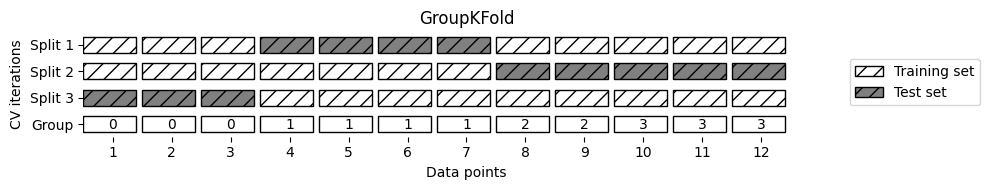

In [ ]:
mglearn.plots.plot_group_kfold()

### Простой решетчатый поиск

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the  test set
        score = svm.score(X_test, y_test)
        # if we got  a better score, store  the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшее значение параметров: {}".format(best_parameters))

Размер обучающего набора: 331 размер тестового набора: 111
Наилучшее значение правильности: 0.02
Наилучшее значение параметров: {'C': 0.001, 'gamma': 0.001}


### Опасность переобучения параметров и проверочный набор данных(которое мне не грозит, к черту диабет)

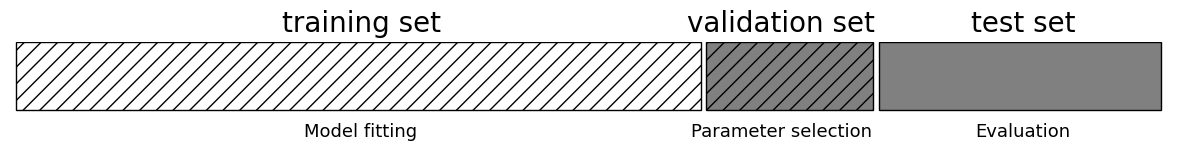

In [ ]:
mglearn.plots.plot_threefold_split()

In [ ]:
# разбиваем данные на обучающий + проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
# разбираем обучающий + проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 248 размер проверочного набора: 83 размер тестового набора: 111

Лучшее значение правильности на проверочном наборе: 0.01
Наилучшие значения параметров:  {'C': 0.001, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.02


### Решетчатый поиск с перекрестной проверкой

In [ ]:
# разбиваем данные на обучающий + проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)
# разбираем обучающий + проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение  и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The lea

SVC(C=100, gamma=0.1)

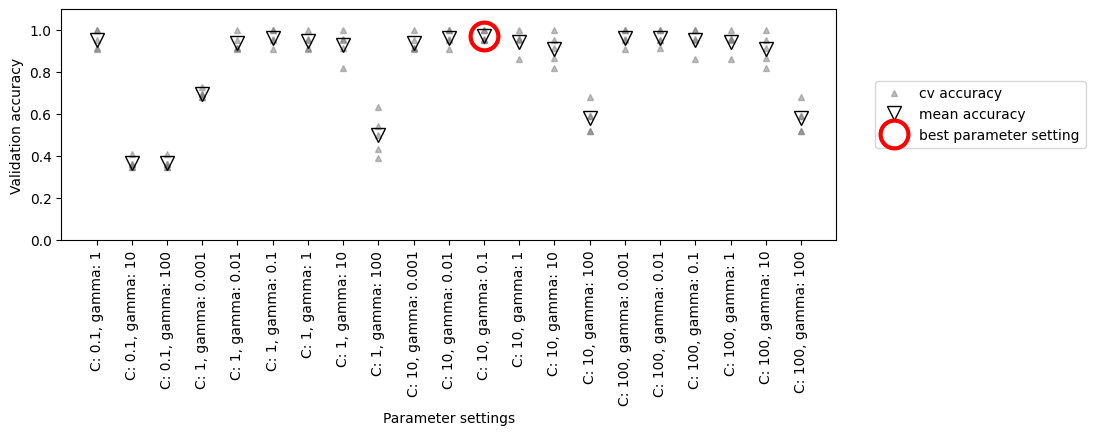

In [ ]:
mglearn.plots.plot_cross_val_selection()

### Результаты решетчатого поиска с перекрестной проверкой

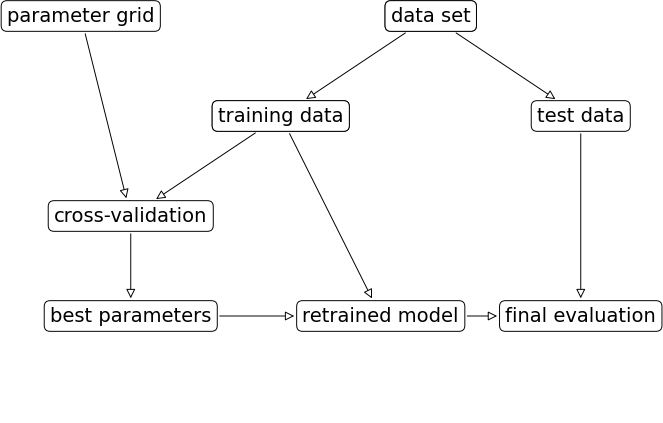

In [ ]:
mglearn.plots.plot_grid_search_overview()

### Процесс отбора параметров и оценки модели с помощью GridSearchCV

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Правильность на тестовом наборе: 0.02
Наилучшее значение параметров: {'C': 10, 'gamma': 1}
Наилучшее значение кросс-валидац. правильности: 0.02


In [ ]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=10, gamma=1)


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043378,0.006839,0.004334,0.005573,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.014925,0.030303,0.015152,0.015152,0.030303,0.021167,0.00746,5
1,0.044063,0.004382,0.006812,0.006185,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.014925,0.030303,0.015152,0.015152,0.030303,0.021167,0.00746,5
2,0.040431,0.008827,0.007034,0.004778,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.014925,0.030303,0.015152,0.015152,0.030303,0.021167,0.00746,5
3,0.044900,0.005469,0.003119,0.004348,0.001,1,"{'C': 0.001, 'gamma': 1}",0.014925,0.030303,0.015152,0.015152,0.030303,0.021167,0.00746,5
4,0.048684,0.012152,0.006072,0.007266,0.001,10,"{'C': 0.001, 'gamma': 10}",0.014925,0.030303,0.015152,0.015152,0.030303,0.021167,0.00746,5


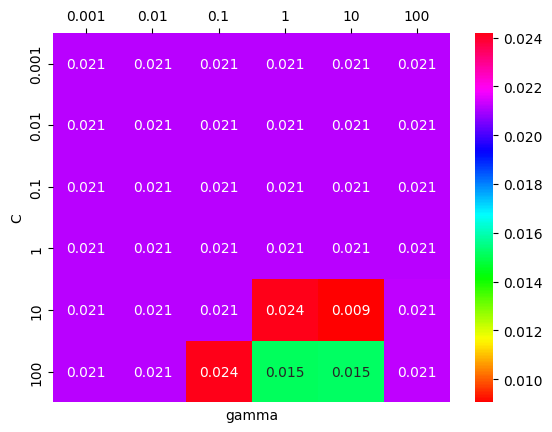

In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим тепловую карту средних значений правильности перекрестной проверки
ax = sns.heatmap(scores, annot=True, xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='hsv')
ax.set(xlabel="gamma", ylabel="C")
ax.xaxis.tick_top()

plt.show()

### Экономичный решетчатый поиск

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=kfold)
grid_search.fit(X_train, y_train)
print("Наилучшее значение параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшее значение параметров: {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности: 0.02


In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения на странице: display(results.T)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035634,0.002946,0.010982,0.001327,0.001,0.001,rbf,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
1,0.032181,0.001910,0.010041,0.000770,0.001,0.01,rbf,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
2,0.031657,0.000503,0.009662,0.000939,0.001,0.1,rbf,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
3,0.031397,0.000156,0.008739,0.000522,0.001,1,rbf,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
4,0.031200,0.000787,0.009134,0.000050,0.001,10,rbf,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
5,0.027944,0.005125,0.011469,0.003434,0.001,100,rbf,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
6,0.036314,0.006211,0.005428,0.003300,0.01,0.001,rbf,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
7,0.033753,0.001760,0.003042,0.004303,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
8,0.033415,0.008311,0.012546,0.002980,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11
9,0.033750,0.006868,0.008911,0.005194,0.01,1,rbf,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.000000,0.000000,0.018182,0.006061,0.008571,11


### Вложенная перекрестная проверка

In [ ]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), X, y, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднее значение правильности перекрестной проверки: ", scores.mean())

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The lea

Значения правильности перекрестной проверки:  [0.01123596 0.01123596 0.02272727 0.         0.04545455]
Среднее значение правильности перекрестной проверки:  0.018130745658835545


In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)   
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки  
        best_params = {}
        best_score = -np.inf
        # итерируем по параметрам   
        for parameters in parameter_grid:
             # собираем значения правильности по всем внутренним разбиениям 
            cv_scores = []
             # итерируем по разбиениям внутренней перекрестной проверки 
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
               # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры 
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

In [ ]:
cores = nested_cv(X, y, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The lea

Значения правильности перекрестной проверки: [0.01123596 0.01123596 0.02272727 0.         0.04545455]



### Несбалансированный набор ошибок

In [ ]:
y = y == 1

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 1.00


In [ ]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 1.00


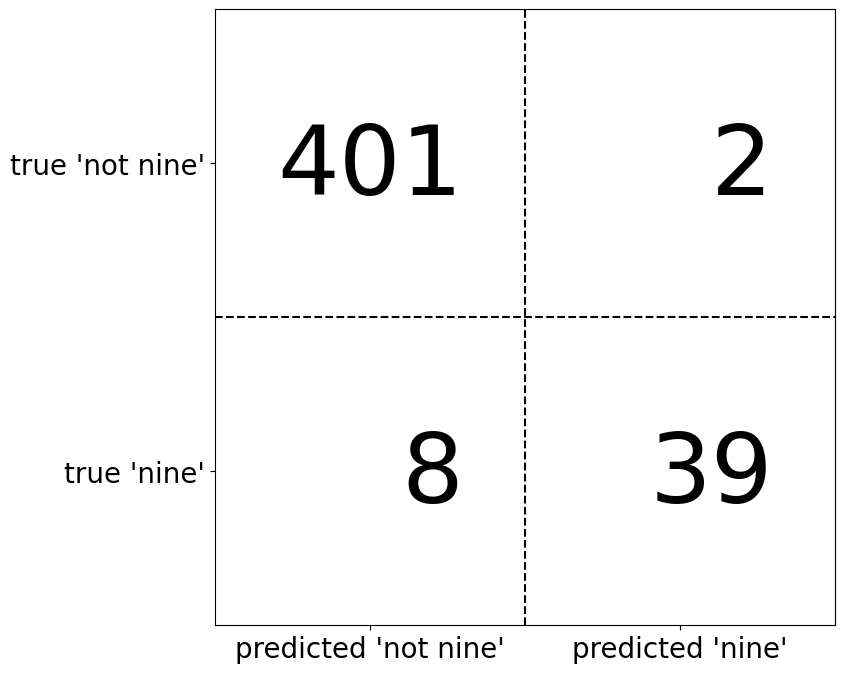

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

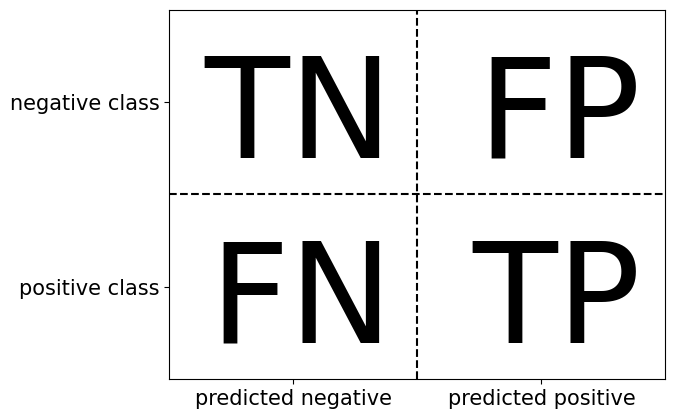

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДмми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nД решений:")
print(confusion_matrix(y_test, pred_tree))

Наиболее часто встречающийся класс:
[[111]]

Дмми-модель:
[[111]]

Д решений:
[[111]]


In [ ]:
print("f1-мера наибольшая частота: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.00


c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
